1) Pengumpulan Data

Data dari https://archive.ics.uci.edu/dataset/45/heart+disease

2) Menelaah Data

In [1]:
#import library
import numpy as np
import pandas as pd
import re
import itertools

In [2]:
dir = "hungarian.data"


In [3]:
#mount akses ke gdrive
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# dir = '/content/drive/MyDrive/BK2023/heart+disease/hungarian.data'

In [5]:
#!ls ""

In [6]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [7]:
# iterasi sesuai kolom & baris pd dataset

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range (0, len(lines),10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [8]:
# informasi dataset yg telah dimasukan ke dlm dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [9]:
# penghapusan fitur nilai null disimbolkan -9.0
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [10]:
# mengubah tipe data float jadi -9.0
df = df.astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

3) Validasi Data

In [12]:
# mengubah nilai -9.0 jadi nilai null sesuai deskripsi dataset
df.replace(-9.0, np.nan, inplace=True)

In [13]:
# menghitung jml null value
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

4) Menentukan Object Data

In [16]:
# memilih 14 fitur yg akan digunakan
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [17]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [19]:
# mengganti nama kolom sesuai dg 14 nama kolom pd deskripsi dataset
column_mapping = {
    2: "age",
    3: "sex",
    8: "cp",
    9: "trestbps",
    11: "chol",
    15: "fbs",
    18: "restecg",
    31: "thalach",
    37: "exang",
    39: "oldpeak",
    40: "slope",
    43: "ca",
    50: "thal",
    57: "target"
}

df_selected.rename (columns=column_mapping, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3796\2336362687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename (columns=column_mapping, inplace=True)


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [21]:
# menghitung jml fitur pd dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

5) Membersihkan Data

In [22]:
# menghitung jml null values di dlm dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [23]:
# fitur yg hampir 90% memiliki nilai null, sehingga perlu dilakukan penghapusan
# penghapusan dg fungsi drop

columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [24]:
# msh ada nilai null di bbrp kolom, gunakan nilai mean di tiap kolom

meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [25]:
#mengubah nilai null jadi nilai mean yg sudah ditentukan sblmnya
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs, 'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [26]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [27]:
# pengecekan thd duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [28]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [29]:
#Menghapus data yang memiliki duplikat

dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

dfClean.head()

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [30]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Mencari korelasi antar fitur
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<AxesSubplot:>

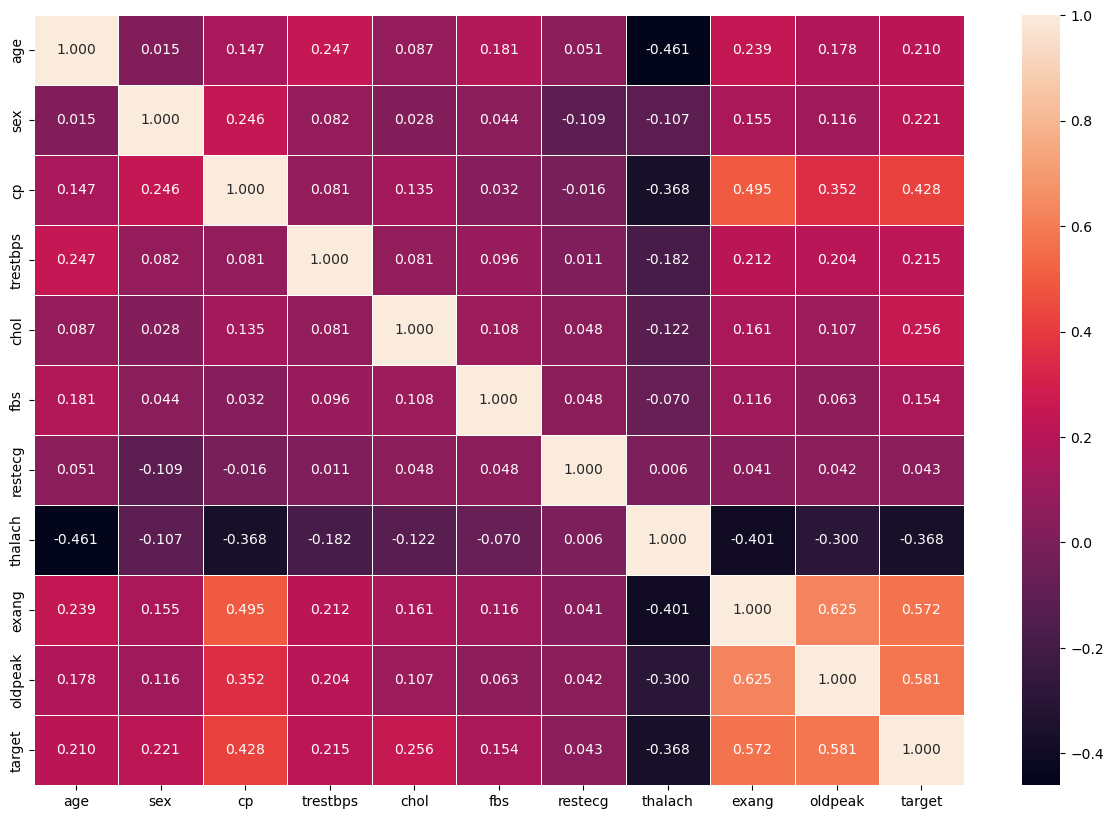

In [33]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6) Konstruksi Data

In [34]:
# bertujuan u/ menyesuaikan semua tipe data di dlm dataset
# dlm tahap ini dataset sdh punya tipe data yg sama, shg tdk dilakukan penyesuaian lagi
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [35]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [36]:
# memisahkan fitur & target lalu simpan ke variabel
X = dfClean.drop('target',axis=1).values
y = dfClean.iloc[:,-1]

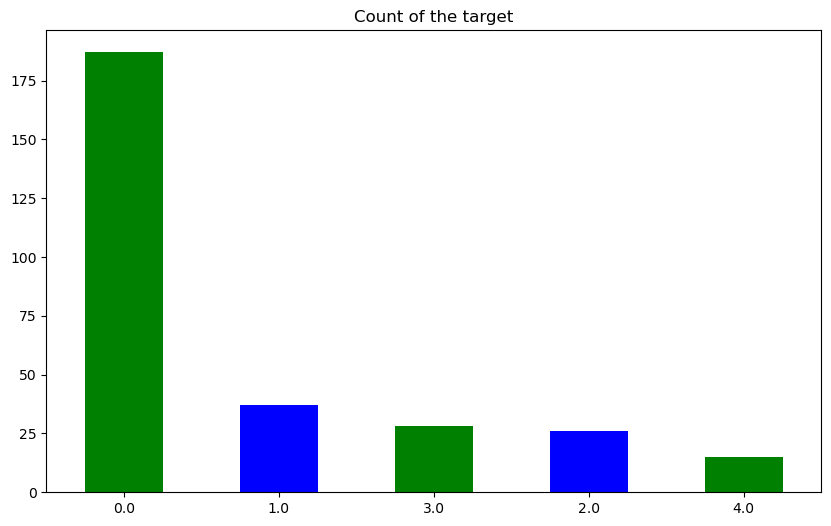

In [37]:
# cek persebaran jml target
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue'])
plt.title('Count of the target')
plt.xticks(rotation=0);



*   grafik menunjukan persebaran target tdk seimbang, perlu diseimbangkan
*   penyeimbangan ada 2, oversampilng & under sampling

  ***Oversampling***, jika jml dataset sedikit
  
   ***Undersampling***, jika jmml dataset terlalu banyak


*   Dlm case ini akan melakukan ***Oversampling*** krn data tdk banyak, dg menggunakan metode SMOTE








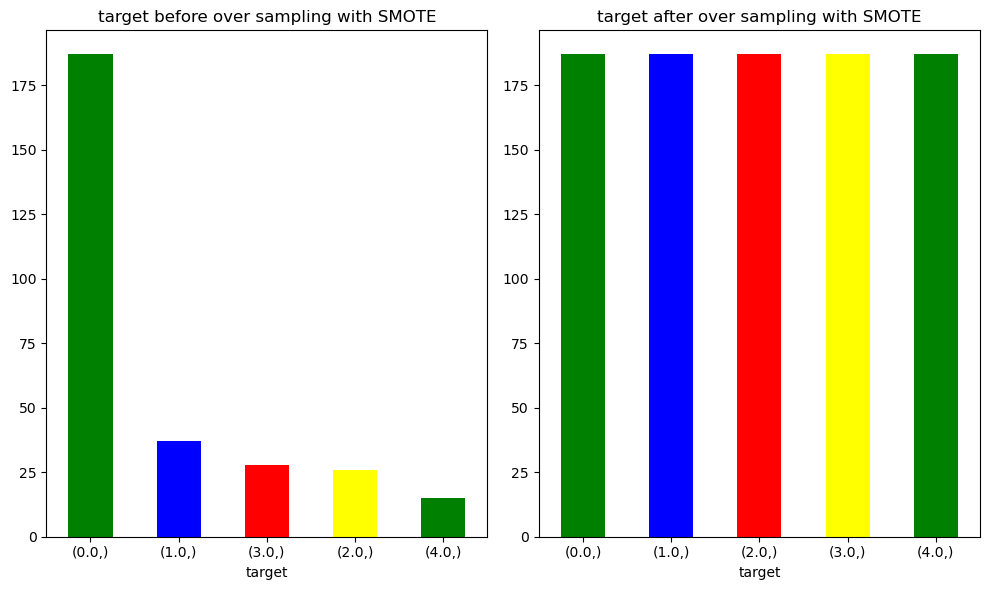

In [38]:
from imblearn.over_sampling import SMOTE

# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target after over sampling with SMOTE')
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [39]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [40]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [41]:
# cek apakah perlu normalisai/ standarisasi
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [42]:
# rentang cukup jauh pd standar deviasi tiap fitur
# perlu normalisai/ standarisasi u/ memperkecil standar deviasi tiap kolom

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled)

935

In [43]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# membagi fitur & target jadi data train & data test
from sklearn.model_selection import train_test_split

# u/ yg oversample saja
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# u/ yg oversample + normalisasi
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

7) Model

In [45]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
               }
  return print(metric_dict)

Model KNN dg K = 3

In [46]:
# Model KNN dg K = 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# menampilkan akurasi KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model
print('K-Nearest Neighbors (KNN) Model :')
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print('Accuracy:', accuracy_knn_smote)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [48]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


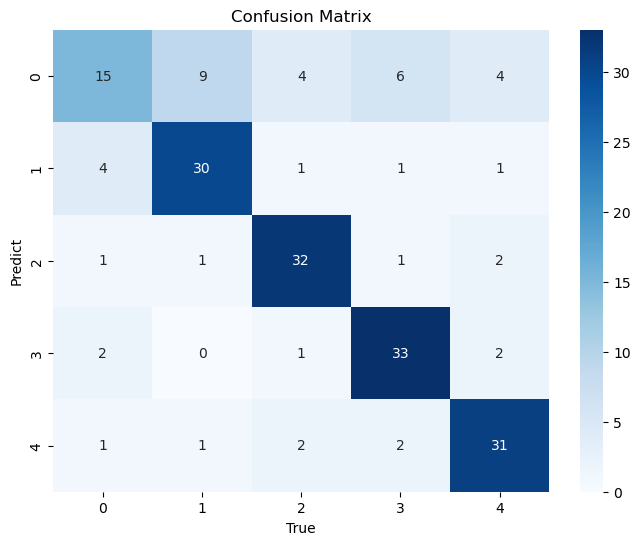

In [49]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [50]:
# random forest dg n-estimators = 100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# menampilkan akurasi random forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [52]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


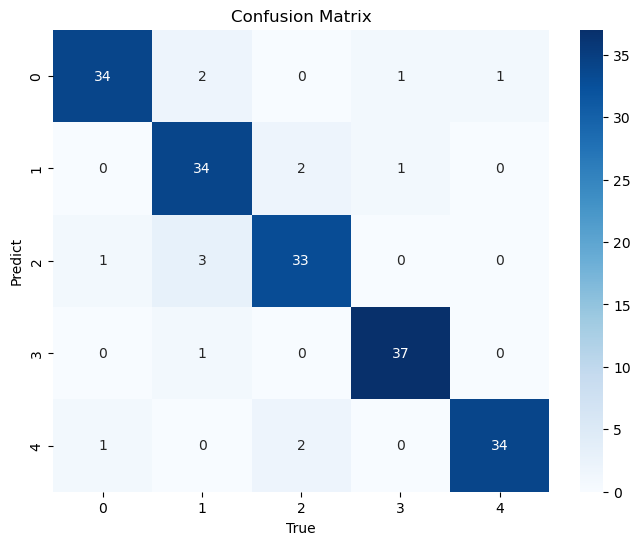

In [53]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [54]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [55]:
# menghitung akurasi xgboost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [56]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


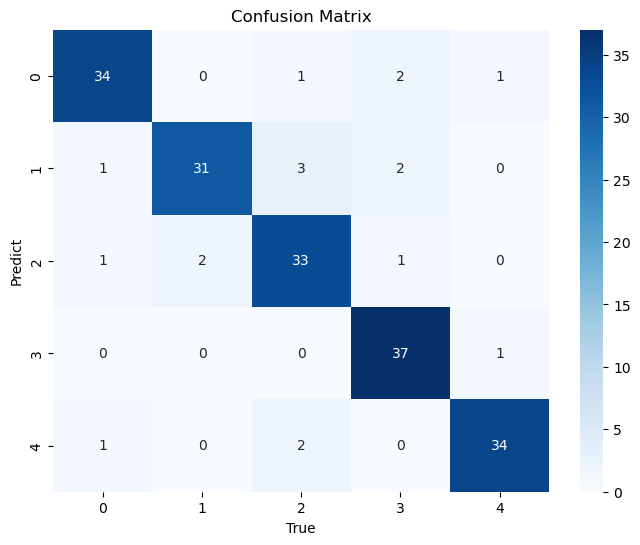

In [57]:
# visualisasi
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Oversample + Normalisasi***


KNN



In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# hasil prediksi
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [60]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


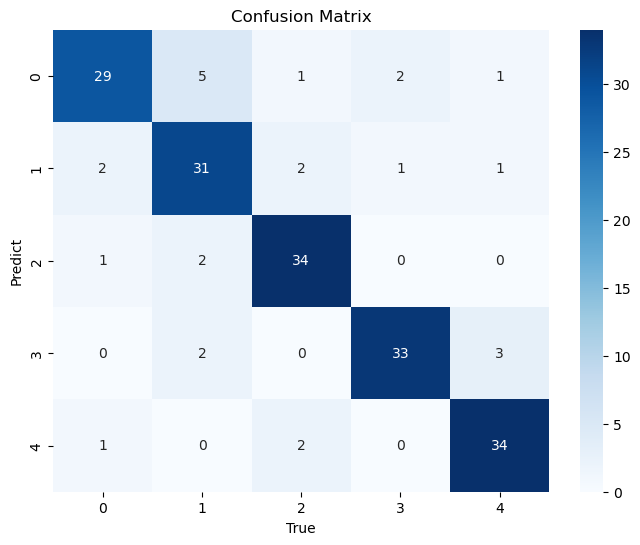

In [61]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [62]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [63]:
# hasil predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [64]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


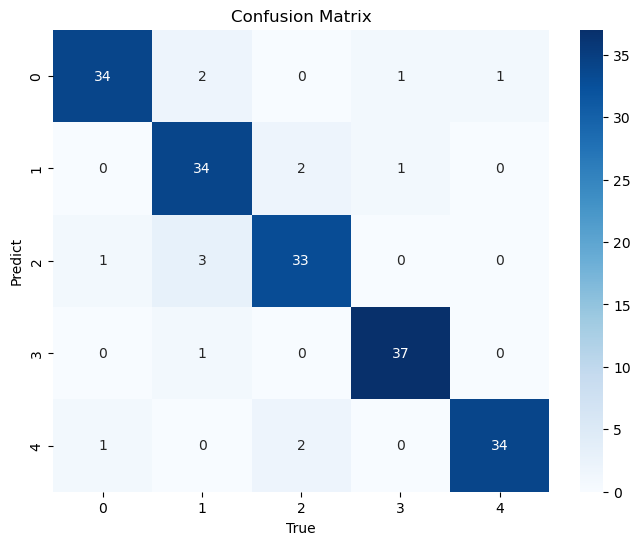

In [65]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [66]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [68]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


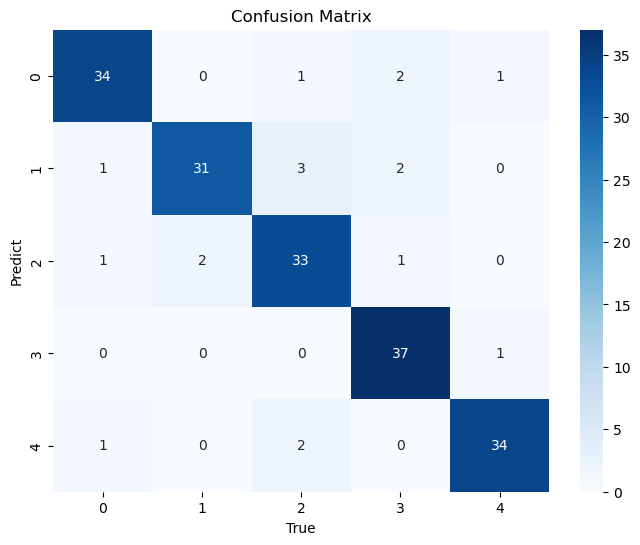

In [69]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Tunning + Normalizzation + Oversample***

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

KNN

In [71]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
    }

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 37, 'algorithm': 'auto'}


In [72]:
# hsl predict
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [73]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


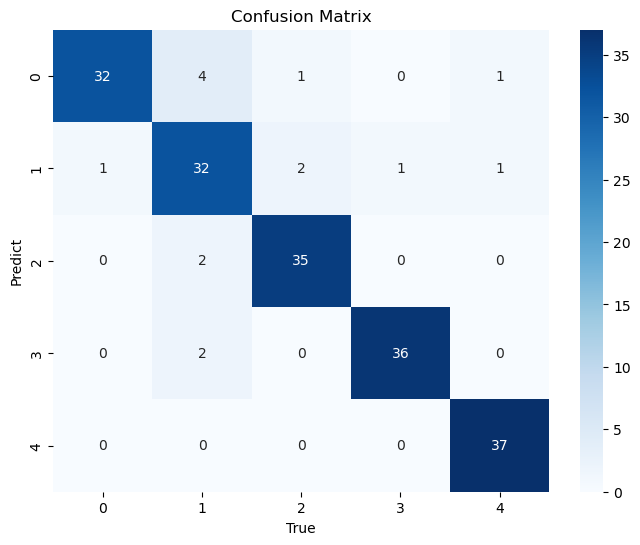

In [74]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Random Forest***

In [75]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
    }

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

d:\ANACONDA\Anaconda_File2\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [76]:
# hsl predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.85      0.89      0.87        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [77]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precision score': 0.916}


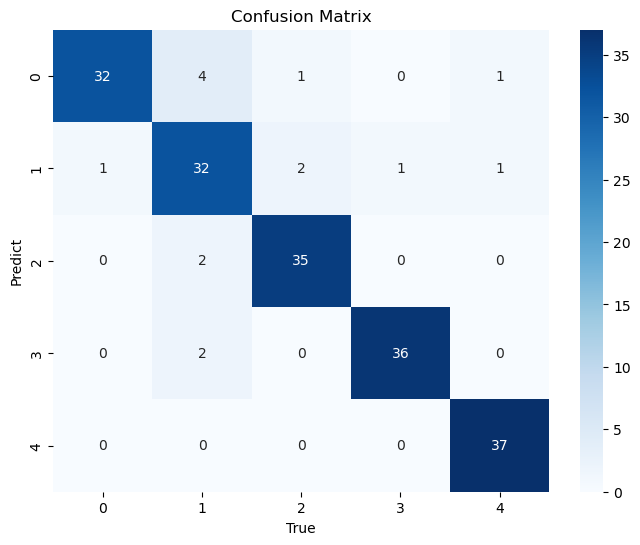

In [78]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***XGBoost***

In [79]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
    }

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [80]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.89      0.84      0.86        37
         2.0       0.84      0.84      0.84        37
         3.0       0.90      0.95      0.92        38
         4.0       0.94      0.89      0.92        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [81]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.887, 'Precision score': 0.888}


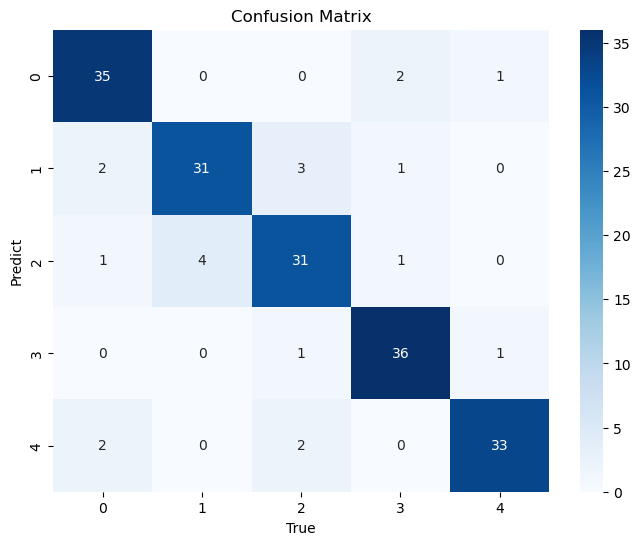

In [82]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

8) ***Evaluasi***

Evaluasi model dg data yg di ***Oversample***

In [83]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


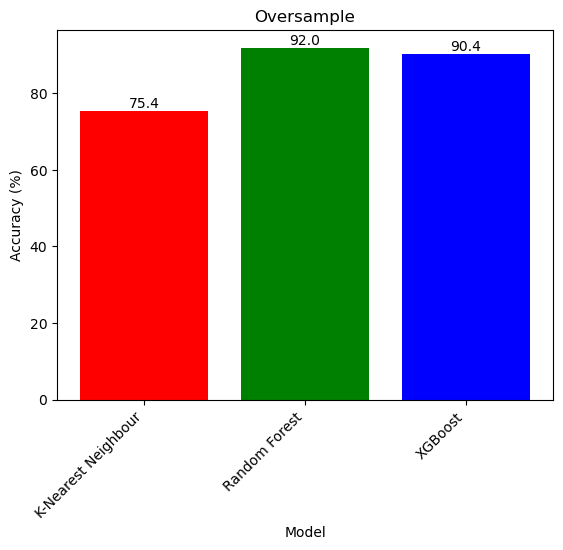

In [84]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling***

In [85]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


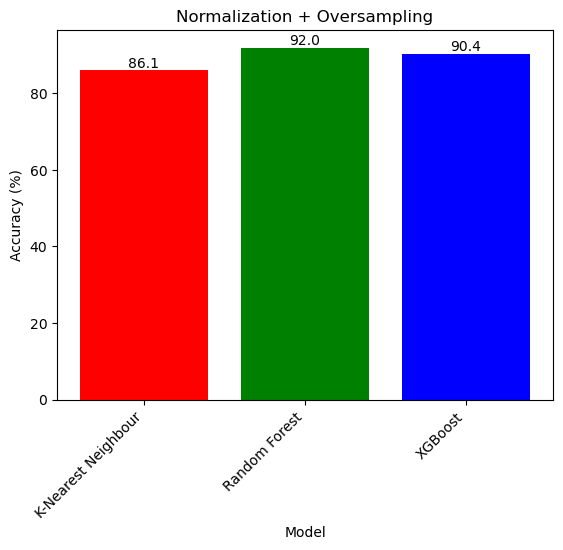

In [86]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling + Tunning***

In [87]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,XGBoost,88.8


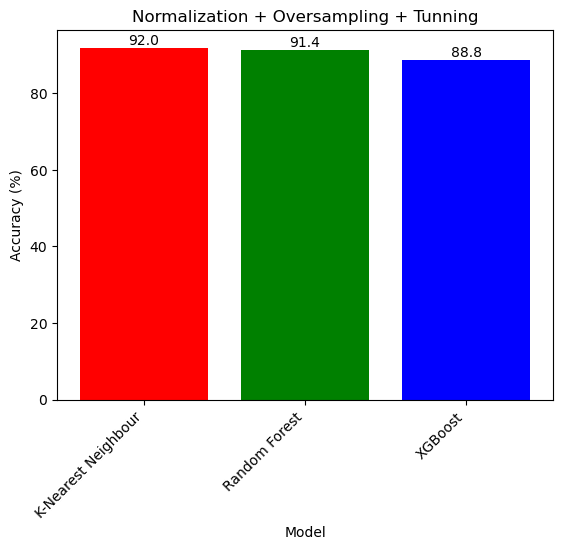

In [88]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

***Mencari Best Model***

In [89]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

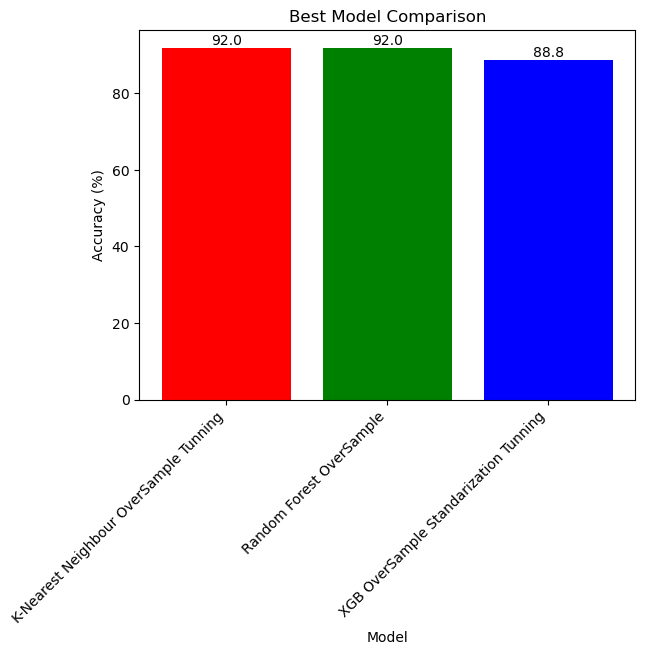

In [90]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [94]:
import pickle

# Save the trained model using pickle
with open('hungarian.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)